In [2]:
import pyfastx

In [3]:
ls data

Carsonella_ruddii_reads_paired_reads_left.fastq
Carsonella_ruddii_reads_paired_reads_right.fastq


In [31]:
lfq = pyfastx.Fastq('data/Carsonella_ruddii_reads_paired_reads_left.fastq')
rfq = pyfastx.Fastq('data/Carsonella_ruddii_reads_paired_reads_right.fastq')


In [26]:
lfq.avglen

100.0

In [34]:
len(rfq) == len(lfq)

True

In [43]:
a = set()
for i in range(len(lfq)):
    a=a.union(set(lfq[i].seq))
    a=a.union(set(rfq[i].seq))
a


{'A', 'C', 'G', 'T'}

In [48]:
for i in lfq:
    print(i)

AAATTATTTTCATAATATTTTATCGTATCAATAAAATTTTCTAAATTTACAAAAATAGAAAAATTATTTATATTTTTTAATAATACTTTTACATTAAAAT
TAGATAGTAAAATTTTAGTTAAAGATTTATCTTTTTTAATTAATAAACCTGTTATAGAATTAATAAAAGATTTTTTTGTAAATGGTATTTCTGTGAAAAT
ATTATTTTTTAAACAATTGGAACTACGAATACTAAGTTCTAAATTATCAATAGATCTTAAATAAACAGAATTAATTTCTAAAATTAAATCATTTTTATTA
ATTTGAATTAATAAATTTTTAAAAAAATTATTCTAAAATATTTAATTCACCATTTAAAATTTTATTTAATTGAAAATAATTTTTATTTTTAACATGATCT
ATAATTAAATTGTACAAAAACGAAATTTTTGACTATGTAAACGAATTATCAAATAAAATAAATTTAACAGAATTAGATGATTCTAAAAAAGAATGAATTA
TTTGTTTTTTTTTATTTTTGCTGTAAATATAAATACTCCAAATAGAAGAATTAAACCAAGTATCTAATACTTCATTTAAATTTTTATAATTTTCTATTCT
TATACAAATTTTATTTTCATAATAATTAATACTTTTTCCTCCACCAATATCTACAAAATTAACTTTTTTATATTTATTTATAATTTTTATTATTTTAAAC
AGTATTAAATAAAATTAAAAAAAACGAAAAAATTTTCAATTTTATTAATTACTATTTAAATTATTTAAATTATAAAAATAAAAAAAAAATTGGACTTTTA
AATATTTTCAATTTTTTGTTATATTTTAAAAAAATTCTTATACAATTAGTAGTGTTTTCTGGTCTCAAGCAAATTAATTTTTTTCCATAATTAAAAAATT
GATATTTAAATTTAAATTTGTTTTTTAAAAATTACAAAAAAGTTGATTATATAAATTTAAGTTATTTTAAAAATGATTTTATGATAAAAAA

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 0: invalid start byte

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

class Kmer():
    def __init__(self, s):
        self.seq = s
        self.k = len(s)
        self.prefix = s[:-1]
        self.suffix = s[1:]


class De_Bruijn_graph():
    def __init__(self, k=10):
        self.G = nx.MultiDiGraph()
        self.k = k

    def get_kmers(self, seq):
        return [Kmer(seq[i:i+self.k]) for i in range(len(seq) - self.k+1)]


    def build_graph(self, fq):
        for read in fq:
            for kmer in self.get_kmers(read.seq):
                self.G.add_nodes_from([kmer.suffix, kmer.prefix])

    def build_graph_from_strings(self, s):
        for read in s:
            for kmer in self.get_kmers(read):
                self.G.add_nodes_from([kmer.suffix, kmer.prefix])
                self.G.add_edge(kmer.prefix, kmer.suffix, label=kmer.seq)


def visualize_graph(graph):
    """
    A naive method to plot graph
    :param G:
    :return:
    """
    nx.draw(graph, with_labels=True, cmap=plt.get_cmap('jet'),pos=nx.circular_layout(graph),connectionstyle='arc3, rad = 0.1')

    plt.show()



In [42]:
inp = 'TAATGCCATAGTAGGGATGTT'
dbg = De_Bruijn_graph(k=5)
dbg.build_graph_from_strings([inp])

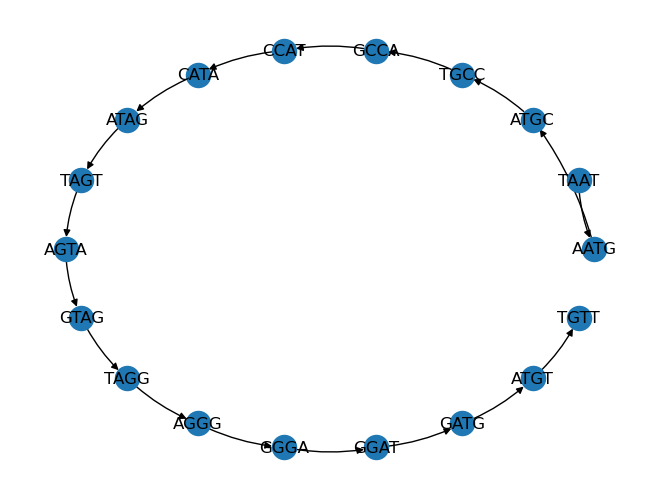

In [43]:
visualize_graph(dbg.G)

In [44]:
s = ''
for u,v in nx.eulerian_path(dbg.G):
    if len(s) == 0:
        s += u + v[-1]
    else:
        s+= v[-1]
s == inp

True

In [35]:
[l + r[-1] for l, r in nx.eulerian_path(dbg.G)]

['TAAT',
 'AATG',
 'ATGG',
 'TGGG',
 'GGGA',
 'GGAT',
 'GATG',
 'ATGC',
 'TGCC',
 'GCCA',
 'CCAT',
 'CATG',
 'ATGT',
 'TGTT']

In [1]:
nx.spring_layout(dbg.G)

NameError: name 'nx' is not defined

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph):
    """
    A naive method to plot graph
    :param G:
    :return:
    """
    nx.draw(graph, with_labels=True, cmap=plt.get_cmap('jet'),pos=nx.circular_layout(graph),connectionstyle='arc3, rad = 0.1')

    plt.show()

In [54]:
from de_Bruijn_graph import De_Bruijn_graph as DBG
import pyfastx


def save_contigs():
    pass


def invert_sequence(s):
    """
    Makes complimentary inversion of the string
    :param s: input sequence
    :return: inverted sequence
    """
    d_inv = {'A': 'T', 'G': 'C', 'T': 'A', 'C': 'G'}
    return ''.join([d_inv[s[i]] for i in range(len(s) - 1, 0, -1)])


dbg = DBG(k=98)

lfq = pyfastx.Fastq('data/Carsonella_ruddii_reads_paired_reads_left.fastq')
rfq = pyfastx.Fastq('data/Carsonella_ruddii_reads_paired_reads_right.fastq')

dbg.update_graph(lfq)
contigs = dbg.get_contigs()
save_contigs()


100%|██████████| 33668/33668 [00:02<00:00, 16131.50it/s]


In [63]:
with open('Failed.txt', 'w') as file:
    for i, c in enumerate(contigs):
        file.write(f'> contig {i+1}\n'+c +'\n')


100%|██████████| 33668/33668 [00:04<00:00, 7269.68it/s] 


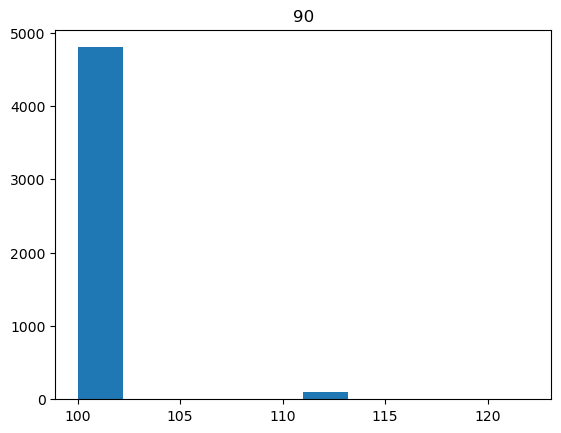

100%|██████████| 33668/33668 [00:05<00:00, 6016.21it/s] 


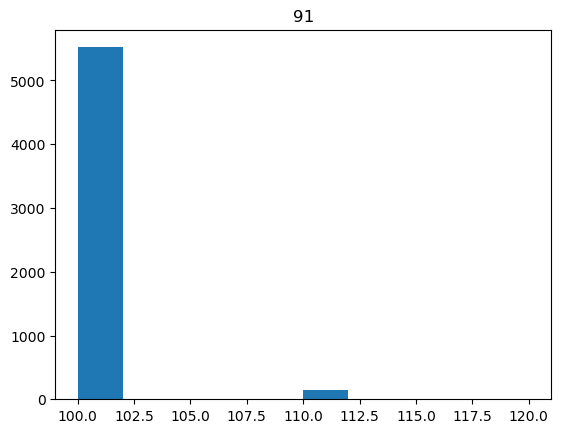

100%|██████████| 33668/33668 [00:05<00:00, 6109.33it/s] 


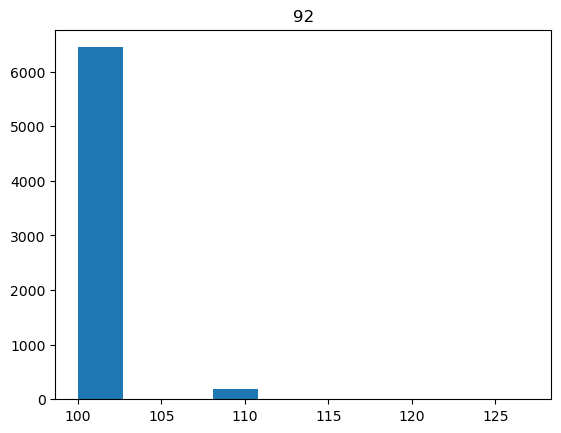

100%|██████████| 33668/33668 [00:03<00:00, 9351.26it/s] 


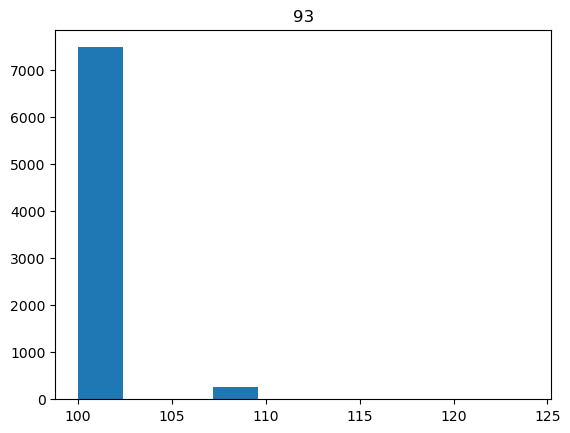

100%|██████████| 33668/33668 [00:03<00:00, 9678.61it/s] 


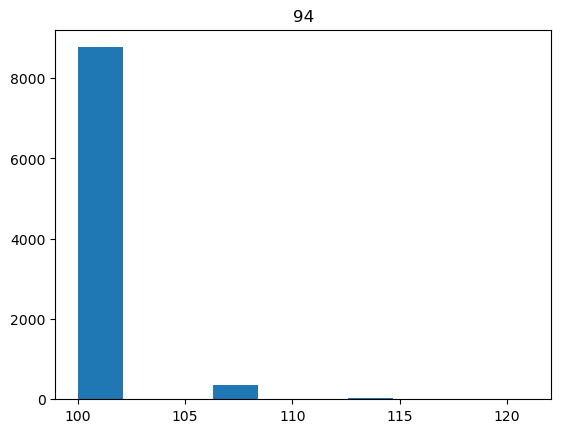

100%|██████████| 33668/33668 [00:02<00:00, 11237.71it/s]


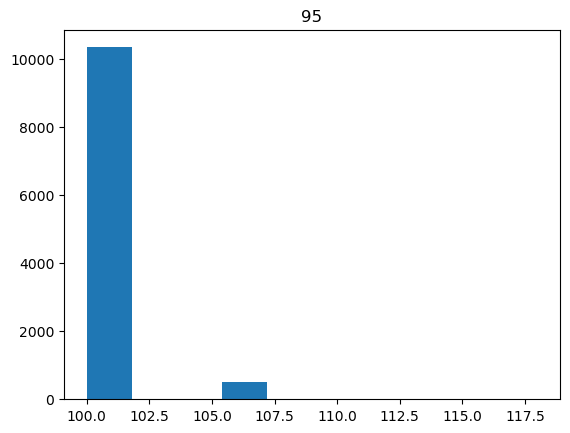

100%|██████████| 33668/33668 [00:02<00:00, 13264.90it/s]


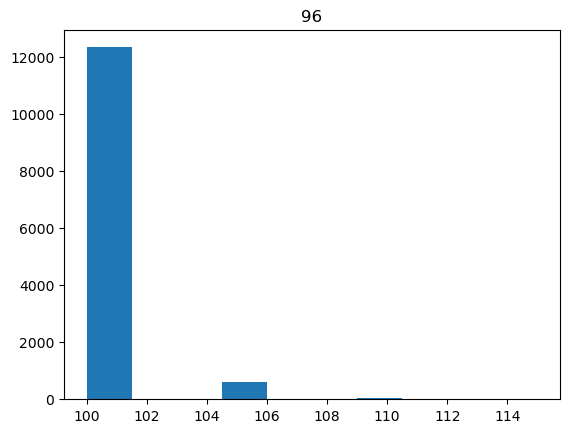

100%|██████████| 33668/33668 [00:02<00:00, 11951.51it/s]


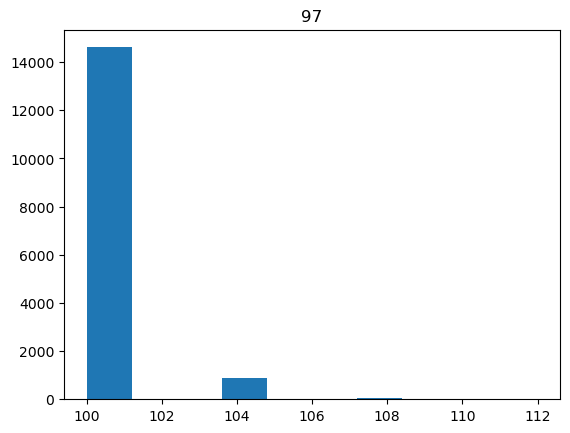

100%|██████████| 33668/33668 [00:01<00:00, 19268.96it/s]


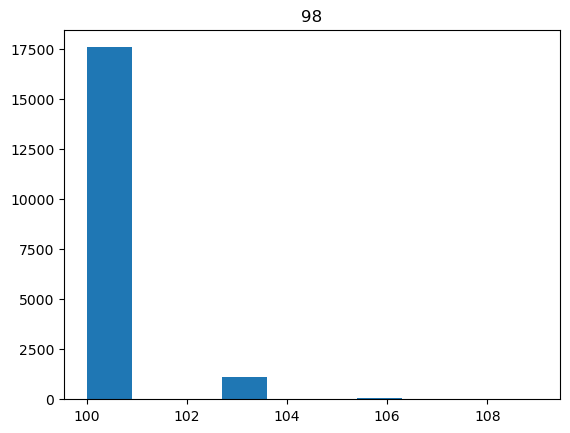

100%|██████████| 33668/33668 [00:01<00:00, 25694.74it/s]


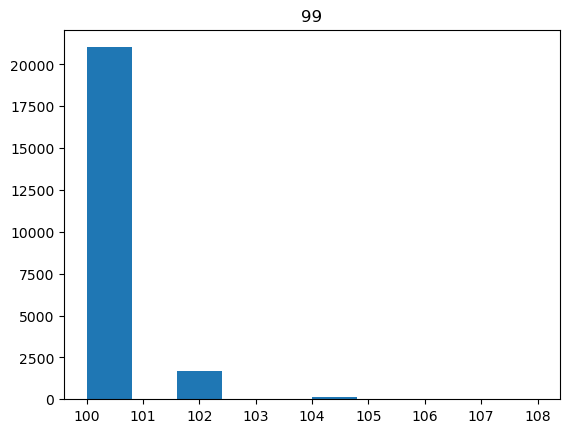

In [57]:
for i in range(90,100):
    dbg = DBG(k=i)

    lfq = pyfastx.Fastq('data/Carsonella_ruddii_reads_paired_reads_left.fastq')

    dbg.update_graph(lfq)
    contigs = dbg.get_contigs()
    plt.hist([len(i) for i in contigs])
    plt.title(f'{i}')
    plt.show()

In [3]:
dbg.num_components

29238

In [8]:
print(lfq[:2])

KeyError: 'the key must be index number or read name'